In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import and_

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station


In [9]:
Measurements.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [10]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
connection = engine.connect()

# Calculate the date 1 year ago from the last data point in the database
climateAnalysis = pd.read_sql('Select * from Measurement', connection, parse_dates=['date'])
finalDate = climateAnalysis.date.max()
initialDate = finalDate - timedelta(days = 365)
initialDate
finalDate

# Perform a query to retrieve the data and precipitation scores
Rain_12months = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date>= '2016-08-23' AND date<= '2017-08-23'", connection, parse_dates=['date'])

# # Sort the dataframe by date
# Rain_12months = Rain_12months.sort_values(by='date', ascending=False)
# # Rain_12months.groupby('date').sum()
# # Save the query results as a Pandas DataFrame and set the index to the date column
# Rain_12months.set_index('date', inplace=True)
# Rain_12months.head()

# # Create Plot (pandasplot)
# Rain_12months_df.plot(x='date', y='prcp', figsize=(15,5))
# plt.title("Daily precipitation Totals Aug 23rd 2016 to Aug 23rd 2017")
# plt.xticks(rotation = 90)
# plt.ylabel('Precipitation')
# plt.xlabel('Days')
# plt.show()

In [11]:
# Create a dictionary for Flask
date_List = Rain_12months.date.tolist()
prcp_List = Rain_12months.prcp.tolist()
Precipitation_dict = {"date": date_List, "prcp": prcp_List}
Precipitation_dict

{'date': [Timestamp('2016-08-23 00:00:00'),
  Timestamp('2016-08-24 00:00:00'),
  Timestamp('2016-08-25 00:00:00'),
  Timestamp('2016-08-26 00:00:00'),
  Timestamp('2016-08-27 00:00:00'),
  Timestamp('2016-08-28 00:00:00'),
  Timestamp('2016-08-29 00:00:00'),
  Timestamp('2016-08-30 00:00:00'),
  Timestamp('2016-08-31 00:00:00'),
  Timestamp('2016-09-01 00:00:00'),
  Timestamp('2016-09-02 00:00:00'),
  Timestamp('2016-09-03 00:00:00'),
  Timestamp('2016-09-04 00:00:00'),
  Timestamp('2016-09-05 00:00:00'),
  Timestamp('2016-09-06 00:00:00'),
  Timestamp('2016-09-07 00:00:00'),
  Timestamp('2016-09-08 00:00:00'),
  Timestamp('2016-09-09 00:00:00'),
  Timestamp('2016-09-10 00:00:00'),
  Timestamp('2016-09-11 00:00:00'),
  Timestamp('2016-09-12 00:00:00'),
  Timestamp('2016-09-13 00:00:00'),
  Timestamp('2016-09-14 00:00:00'),
  Timestamp('2016-09-15 00:00:00'),
  Timestamp('2016-09-16 00:00:00'),
  Timestamp('2016-09-17 00:00:00'),
  Timestamp('2016-09-18 00:00:00'),
  Timestamp('2016-09

In [12]:
# # Use Pandas to calcualte the summary statistics for the precipitation data
Precip_data = session.query(Measurements.date, Measurements.prcp)
Precip_data_df = pd.DataFrame(Precip_data)
Precip_data_df.head()

# Create lists and dicts needed
Precip_Dict = {}
Precip_Mean_Dict = {}
Precip_Median_Dict = {}
Precip_Mode_Dict = {}
Precip_Var_Dict = {}
Precip_Std_Dict = {}
Precip_SEM_Dict = {}

Precip_Mean_Dict = Precip_data_df['prcp'].mean()
Precip_Median_Dict = Precip_data_df['prcp'].median()
Precip_Mode_Dict = Precip_data_df['prcp'].mode()
Precip_Var_Dict = Precip_data_df['prcp'].var()
Precip_Std_Dict = Precip_data_df['prcp'].std()
Precip_SEM_Dict = Precip_data_df['prcp'].sem()
    
# # Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"MEAN": Precip_Mean_Dict, "MEDIAN": Precip_Median_Dict, "VARIANCE": Precip_Var_Dict, 
                     "STANDARD DEVIATION": Precip_Std_Dict, "SEM": Precip_SEM_Dict}

In [13]:
# Design a query to show how many stations are available in this dataset?
# StationNos = pd.read_sql('SELECT station FROM Measurement', connection)
StationNos = pd.read_sql('SELECT id, name, station FROM Station', connection)
# StationNos['station'].unique()
StationNos

# Create a dictionary for Flask
id_List = StationNos.id.tolist()
Station_List = StationNos.station.tolist()
Station_name_List = StationNos.name.tolist()

Station_dict = {"id": id_List, "station": Station_List, "station name": Station_name_List}
Station_dict

{'id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'station': ['USC00519397',
  'USC00513117',
  'USC00514830',
  'USC00517948',
  'USC00518838',
  'USC00519523',
  'USC00519281',
  'USC00511918',
  'USC00516128'],
 'station name': ['WAIKIKI 717.2, HI US',
  'KANEOHE 838.1, HI US',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'PEARL CITY, HI US',
  'UPPER WAHIAWA 874.3, HI US',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  'WAIHEE 837.5, HI US',
  'HONOLULU OBSERVATORY 702.2, HI US',
  'MANOA LYON ARBO 785.2, HI US']}

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_Stations = pd.read_sql('SELECT station, COUNT(station) AS station_count FROM Measurement GROUP BY station ORDER BY station_count DESC', connection)
Active_Stations

,station,station_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded
# highest temperature recorded, and average temperature of the most active station?
TempList = pd.read_sql('SELECT MIN(tobs) AS Min_Temp FROM Measurement WHERE station = "USC00519281"', connection)
TempList['Max_Temp'] = pd.read_sql('SELECT MAX(tobs) AS Max_Temp FROM Measurement WHERE station = "USC00519281"', connection)
TempList['Avg_Temp'] = pd.read_sql('SELECT AVG(tobs) AS Avg_Temp FROM Measurement WHERE station = "USC00519281"', connection)
TempList

,Min_Temp,Max_Temp,Avg_Temp
0,54.0,85.0,71.663781


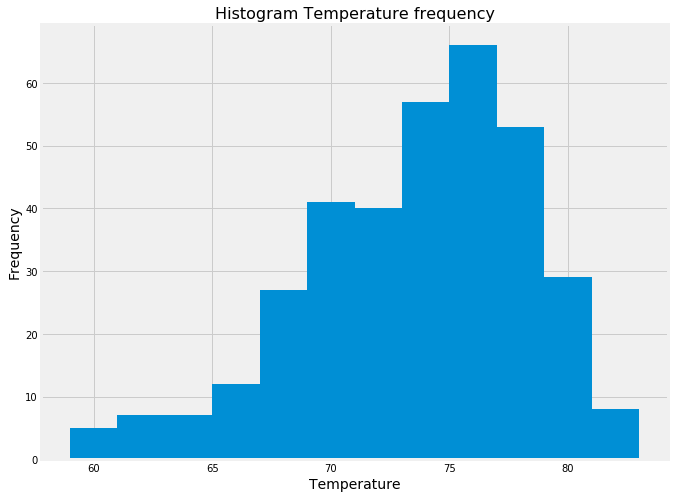

In [16]:
# Choose the station with the highest number of temperature observations.
TempRange=[]
TempRange.append(pd.read_sql('SELECT Min(tobs), Max(tobs) FROM Measurement', connection))
TempRange
mostTemps_station = pd.read_sql('SELECT station, COUNT(tobs) AS Temp_Obs_count FROM Measurement WHERE tobs>= 50 AND tobs<= 90 GROUP BY station ORDER BY Temp_Obs_count DESC', connection)
mostTemps_station

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date 1 year ago from the last data point in the database
DateRange=[]
DateRange.append(pd.read_sql('SELECT Min(date), Max(date) FROM Measurement', connection))

# Perform a query to retrieve the temperature data from specific station
Temp_12months = pd.read_sql("SELECT date, tobs FROM Measurement WHERE station='USC00519281' AND date>= '2016-08-23' AND date<= '2017-08-23'", connection, parse_dates=['date'])
Temp_12months

# Create a dictionary for Flask
Temp_date_List = Temp_12months.date.tolist()
Temp_List = Temp_12months.tobs.tolist()
Temperature_dict = {"date": Temp_date_List, "prcp": Temp_List}
Temperature_dict

# Create Histogram plot
plt.figure(figsize=(10,8))
plt.hist(Temp_12months.tobs, bins=12)
plt.title("Histogram Temperature frequency", fontsize=16)
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
def calc_temps(start_date, end_date):
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
#     Select a default end date
    if end_date == None:
        end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    else:
        return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28'))

TypeError: calc_temps() missing 1 required positional argument: 'end_date'

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# for your trip using the previous year's data for those same dates.
vacTempCheck = calc_temps('2015-04-01', '2015-04-10')
print(vacTempCheck)

[(63.0, 72.96825396825396, 80.0)]


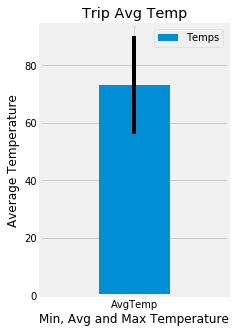

In [33]:
# # Plot the results from your previous query as a bar chart.
# # Use "Trip Avg Temp" as your Title
# # Use the average temperature for the y value

# Create bar chart
# Make lists for df
vacTempCheck_List = list(np.ravel(vacTempCheck))
Avg_vacTempCheck_List = vacTempCheck_List[1]
Avg_vacTempCheck_List
titleList=['AvgTemp']

# Make a df
Vacation_dict = {"Title": titleList, "Temps": Avg_vacTempCheck_List}
Vacation_df = pd.DataFrame(Vacation_dict)
Vacation_df

# creating error 
x = titleList
y = Avg_vacTempCheck_List
y_errormin =vacTempCheck_List[0] 
y_errormax =vacTempCheck_List[2] 
x_error = 0
y_error = y_errormax -y_errormin
          
# Create Plot (pandasplot)
Vacation_df.plot(x='Title', y='Temps', yerr=y_error, kind='bar', width=0.3, figsize=(3,5))
plt.title("Trip Avg Temp")
plt.xticks(rotation = 0)
plt.ylabel('Average Temperature')
plt.xlabel('Min, Avg and Max Temperature')
plt.show()

# # Error bar
# # creating error
# # PTP=vacTempCheck_List[2]-vacTempCheck_List[0]
# # y_error = PTP
# # plt.errorbar(x='Title', y='Temps', yerr = y_error) 
# # plt.show()
# print(type(vacTempCheck_List[2]))

# # creating error 
# x = titleList
# y = Avg_vacTempCheck_List
# y_errormin =vacTempCheck_List[0] 
# y_errormax =vacTempCheck_List[2] 
# x_error = 0
# y_error =[y_errormin, y_errormax] 
# # ploting graph
# # Vacation_df.plot(x='Title', y='Temps', kind='bar', figsize=(5,5))
# plt.bar(x, y, color='orange', alpha=.5, width=0.5) 
# plt.errorbar(x, y, yerr = y_error, xerr = x_error, fmt ='k')

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfallSum = pd.read_sql("SELECT m.id, m.date, m.prcp, SUM(m.prcp) AS station_prcp_SUM, m.tobs, s.id, s.name, s.station, s.latitude, s.longitude, s.elevation FROM Measurement AS m JOIN Station AS s ON m.station = s.station WHERE date>= '2015-04-01' AND date<= '2015-04-10' GROUP BY s.station ORDER BY station_prcp_SUM DESC", connection, parse_dates=['date'])
rainfallSum
# JOIN Station ON Measurement.station=Station.station

,id,date,prcp,station_prcp_SUM,tobs,id,name,station,latitude,longitude,elevation
0,18726,2015-04-01,0.48,1.58,69.0,9,"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,152.4
1,14099,2015-04-01,0.64,1.06,70.0,7,"WAIHEE 837.5, HI US",USC00519281,21.45167,-157.84889,32.9
2,4610,2015-04-01,0.24,0.53,73.0,2,"KANEOHE 838.1, HI US",USC00513117,21.42340,-157.80150,14.6
3,6895,2015-04-01,0.03,0.31,75.0,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,21.52130,-157.83740,7.0
4,11378,2015-04-01,0.25,0.27,78.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,21.33556,-157.71139,19.5
5,1854,2015-04-01,0.00,0.01,76.0,1,"WAIKIKI 717.2, HI US",USC00519397,21.27160,-157.81680,3.0
6,16819,2015-04-02,NaN,0.00,79.0,8,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,21.31520,-157.99920,0.9


In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
    
daily_normals("04-10")

[(64.0, 71.40350877192982, 79.0)]

In [47]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
normals=daily_normals("04-10")
normals
# Set the start and end date of the trip
vac_startdate = '2015-04-01'
vac_enddate = '2015-04-10'
# Use the start and end date to create a range of dates
initialDate = finalDate - timedelta(days = 365)
vac_startdate = vac_enddate - timedelta(days = 10)
vac_startdate
# numdays
# dateList = []
# for x in range (0, numdays):
#     dateList.append(a - datetime.timedelta(days = x))
# print dateList
# # Stip off the year and save a list of %m-%d strings

# # Loop through the list of %m-%d strings and calculate the normals for each date
# import datetime

# a = datetime.datetime.today()
# numdays = 100
# dateList = []
# for x in range (0, numdays):
#     dateList.append(a - datetime.timedelta(days = x))
# print dateList

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.timedelta'

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


### Flask App

In [ ]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/")
def index():
    return (
        f"<h1>Welcome! <br/><br/></h1>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end><br/>"
    )
@app.route("/api/v1.0/precipitation")
def precipitation():
    return jsonify(Precipitation_dict)

@app.route("/api/v1.0/stations")
def stations():
    return jsonify(Station_dict)

@app.route("/api/v1.0/tobs")
def temperatures():
    return jsonify(Temperature_dict)

# @app.route("/api/v1.0/<start>")
# def start():
#     return "This is home. This is where the heart is"

# @app.route("/api/v1.0/<start>/<end>")
# def end():
#     return "This is home. This is where the heart is"

if __name__=="__main__":
    app.run(debug=True)